In [61]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [114]:
# Loading the dataset
df = pd.read_csv('df.csv', low_memory=False)

# Showing the first few rows
df.head()


,Unnamed: 0,UserID,movieid,Rating,Timestamp,title,genre,names,date_x,score,...,orig_title,status,orig_lang,budget_x,revenue,country,Gender,Age,Occupation,Zip-code
0,0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,One Flew Over the Cuckoo's Nest,04/01/1976,84.0,...,One Flew Over the Cuckoo's Nest,Released,English,4400000.0,163274115.0,AU,F,1,10,48067
1,1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,James and the Giant Peach,04/03/1997,65.0,...,James and the Giant Peach,Released,English,38000000.0,28946127.0,AU,F,1,10,48067
2,2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,My Fair Lady,10/21/1964,75.0,...,My Fair Lady,Released,English,17000000.0,72072607.0,US,F,1,10,48067
3,3,1,3408,4,978300275,Erin Brockovich (2000),Drama,Erin Brockovich,04/13/2000,74.0,...,Erin Brockovich,Released,English,50000000.0,257805243.0,AU,F,1,10,48067
4,4,1,1287,5,978302039,Ben-Hur (1959),Action|Adventure|Drama,Ben-Hur,05/12/1960,79.0,...,Ben-Hur,Released,English,95000000.0,91669648.0,AU,F,1,10,48067


In [64]:
# Checking basic info about the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626139 entries, 0 to 626138
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  626139 non-null  int64  
 1   UserID      626139 non-null  int64  
 2   movieid     626139 non-null  int64  
 3   Rating      626139 non-null  int64  
 4   Timestamp   626139 non-null  int64  
 5   title       626139 non-null  object 
 6   genre       626139 non-null  object 
 7   names       626139 non-null  object 
 8   date_x      626139 non-null  object 
 9   score       626139 non-null  float64
 10  genre_2     626139 non-null  object 
 11  overview    626139 non-null  object 
 12  crew        626139 non-null  object 
 13  orig_title  626139 non-null  object 
 14  status      626139 non-null  object 
 15  orig_lang   626139 non-null  object 
 16  budget_x    626139 non-null  float64
 17  revenue     626139 non-null  float64
 18  country     626139 non-null  object 
 19  Ge

In [65]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values
df.fillna({'overview': 'Unknown', 'names': 'Unknown', 'crew': 'Unknown'}, inplace=True)

# For numeric columns, fill missing values with 0
df.fillna(0, inplace=True)


Unnamed: 0    0
UserID        0
movieid       0
Rating        0
Timestamp     0
title         0
genre         0
names         0
date_x        0
score         0
genre_2       0
overview      0
crew          0
orig_title    0
status        0
orig_lang     0
budget_x      0
revenue       0
country       0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64


In [66]:
# Convert timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

# Extract year, month, and day of the week
df['year'] = df['Timestamp'].dt.year
df['month'] = df['Timestamp'].dt.month
df['day_of_week'] = df['Timestamp'].dt.day_name()  # 0=Monday, 6=Sunday


In [67]:
# Add a popularity score based on revenue and budget
df['popularity'] = df['revenue'] / (df['budget_x'] + 1)  # Avoid dividing by zero


In [68]:
df.head()


,Unnamed: 0,UserID,movieid,Rating,Timestamp,title,genre,names,date_x,score,...,revenue,country,Gender,Age,Occupation,Zip-code,year,month,day_of_week,popularity
0,0,1,1193,5,2000-12-31 22:12:40,One Flew Over the Cuckoo's Nest (1975),Drama,One Flew Over the Cuckoo's Nest,04/01/1976,84.0,...,163274115.0,AU,F,1,10,48067,2000,12,Sunday,37.107745
1,1,1,661,3,2000-12-31 22:35:09,James and the Giant Peach (1996),Animation|Children's|Musical,James and the Giant Peach,04/03/1997,65.0,...,28946127.0,AU,F,1,10,48067,2000,12,Sunday,0.761740
2,2,1,914,3,2000-12-31 22:32:48,My Fair Lady (1964),Musical|Romance,My Fair Lady,10/21/1964,75.0,...,72072607.0,US,F,1,10,48067,2000,12,Sunday,4.239565
3,3,1,3408,4,2000-12-31 22:04:35,Erin Brockovich (2000),Drama,Erin Brockovich,04/13/2000,74.0,...,257805243.0,AU,F,1,10,48067,2000,12,Sunday,5.156105
4,4,1,1287,5,2000-12-31 22:33:59,Ben-Hur (1959),Action|Adventure|Drama,Ben-Hur,05/12/1960,79.0,...,91669648.0,AU,F,1,10,48067,2000,12,Sunday,0.964944


In [69]:
# Calculate the average rating for each movie
top_movies = df.groupby('title')['Rating'].mean().sort_values(ascending=False)

# Show the top 10 highest-rated movies
print(top_movies.head(10))


title
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)            4.560510
Schindler's List (1993)                                                        4.510417
Raiders of the Lost Ark (1981)                                                 4.477725
Rear Window (1954)                                                             4.476190
Paths of Glory (1957)                                                          4.473913
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)    4.449890
To Kill a Mockingbird (1962)                                                   4.425647
Double Indemnity (1944)                                                        4.415608
Casablanca (1942)                                                              4.412822
Yojimbo (1961)                                                                 4.404651
Name: Rating, dtype: float64


In [71]:
genre_ratings = df.groupby('genre')['Rating'].mean().sort_values(ascending=False)
print(genre_ratings)


genre
Sci-Fi|War                            4.449890
Crime|Film-Noir                       4.415608
Comedy|Drama|Western                  4.404651
Adventure|War                         4.401925
Film-Noir|Thriller                    4.304979
                                        ...   
Action|Sci-Fi|Western                 2.158537
Action|Adventure|Children's|Sci-Fi    1.874286
Children's                            1.810811
Action|Children's                     1.612903
Action|Adventure|Children's           1.318182
Name: Rating, Length: 208, dtype: float64


In [74]:
# Count the number of movies for each genre
popular_genres = df['genre'].value_counts()

# Show the top 10 genres
print(popular_genres.head(10))

genre
Comedy                          60061
Drama                           49776
Comedy|Romance                  23282
Animation|Children's|Musical    22013
Horror                          19221
Comedy|Drama                    17050
Action|Thriller                 16054
Drama|Romance                   15941
Action|Adventure|Sci-Fi         14648
Comedy|Horror                   14129
Name: count, dtype: int64


In [81]:
# Extract top-rated directors
top_directors = df.groupby('names')['Rating'].mean().sort_values(ascending=False)

# Show the top 10 directors
print(top_directors.head(10))


names
Seven Samurai                                                           4.560510
Schindler's List                                                        4.510417
Raiders of the Lost Ark                                                 4.477725
Rear Window                                                             4.476190
Paths of Glory                                                          4.473913
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb    4.449890
To Kill a Mockingbird                                                   4.425647
Double Indemnity                                                        4.415608
Casablanca                                                              4.412822
Yojimbo                                                                 4.404651
Name: Rating, dtype: float64


In [83]:
# Count movies by original language
language_distribution = df['orig_lang'].value_counts()

# Show the top 10 languages
print(language_distribution.head(10))


orig_lang
English               597780
French                  7333
Italian                 6645
Japanese                3839
German                  2555
Korean                  1769
Spanish, Castilian      1311
Cantonese               1286
Chinese                 1148
No Language              905
Name: count, dtype: int64


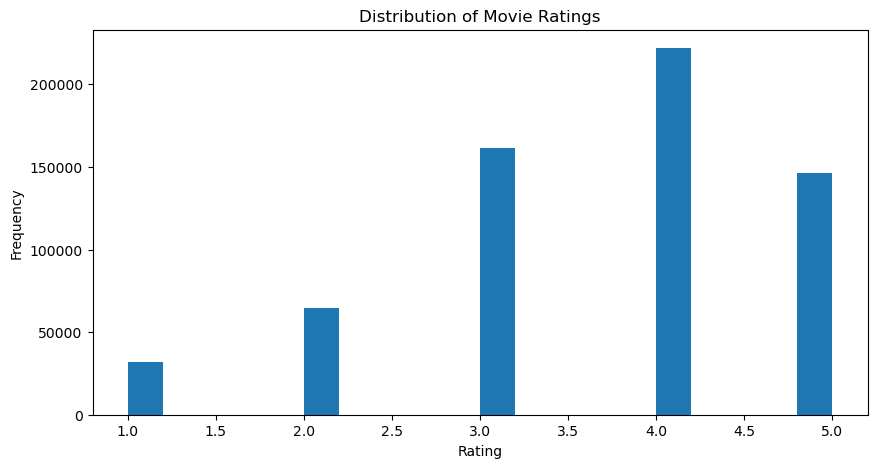

In [85]:
# Plot histogram of ratings
df['Rating'].plot(kind='hist', bins=20, figsize=(10, 5), title='Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


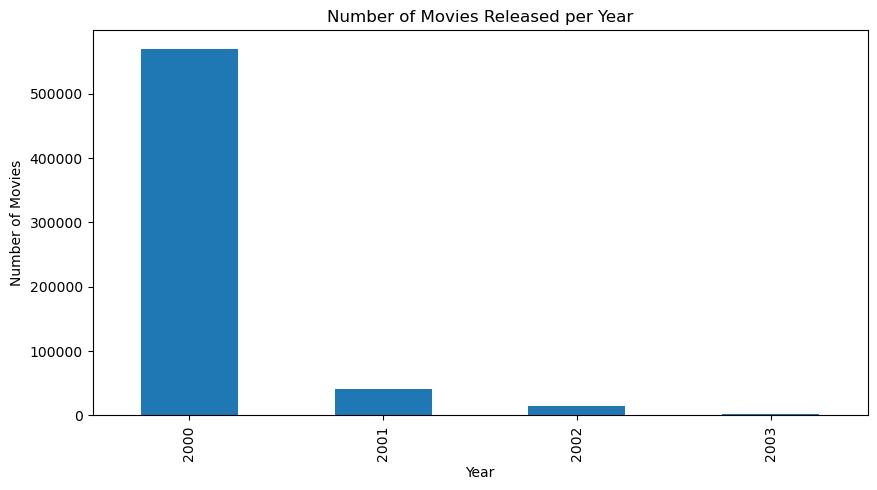

In [87]:
# Count movies by year
movies_per_year = df['year'].value_counts().sort_index()

movies_per_year.plot(kind='bar', figsize=(10, 5), title='Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()


In [89]:
def recommend_by_genre(genre, num_movies=5):
    # Filter movies by the given genre
    genre_movies = df[df['genre'] == genre]
    
    # Sort them by rating
    top_genre_movies = genre_movies.sort_values(by='Rating', ascending=False)
    
    # Return the top movies
    return top_genre_movies[['title', 'Rating']].head(num_movies)

# Example: Recommend top 5 Action movies
print(recommend_by_genre('Action', num_movies=5))


                               title  Rating
392735  From Russia with Love (1963)       5
294158               Bad Boys (1995)       5
443721     For Your Eyes Only (1981)       5
293178     For Your Eyes Only (1981)       5
293179        Licence to Kill (1989)       5


In [91]:
def recommend_similar(movie_title, num_movies=5):
    # Find the genre of the given movie
    movie_genre = df[df['names'] == movie_title]['genre'].values[0]
    
    # Filter movies with the same genre
    similar_movies = df[df['genre'] == movie_genre]
    
    # Sort by rating
    top_similar_movies = similar_movies.sort_values(by='Rating', ascending=False)
    
    # Return the top movies
    return top_similar_movies[['names', 'Rating']].head(num_movies)

# Example: Recommend movies similar to "The Dark Knight"
print(recommend_similar('Top Gun', num_movies=5))


                 names  Rating
308735  Romeo Must Die       5
92497          Top Gun       5
293209  Romeo Must Die       5
293660         Top Gun       5
294320  Romeo Must Die       5


In [93]:
# 1. Top Genres by Age Group
age_group_preferences = df.groupby(['Age', 'genre'])['Rating'].mean().sort_values(ascending=False)
print("Top Genres by Age Group:\n", age_group_preferences.head(10))

# Extract specific age group preferences
top_age_18_24 = age_group_preferences.loc[18].sort_values(ascending=False).head(1)
top_age_25_34 = age_group_preferences.loc[25].sort_values(ascending=False).head(1)

print("\nUsers aged 18-24 rate the highest genre as:\n", top_age_18_24)
print("Users aged 25-34 rate the highest genre as:\n", top_age_25_34)

# 2. Gender-Based Preferences
gender_preferences = df.groupby(['Gender', 'genre'])['Rating'].mean().sort_values(ascending=False)
print("\nTop Genres by Gender:\n", gender_preferences.head(10))

# Extract preferences for Male and Female users
top_male_preferences = gender_preferences.loc['M'].sort_values(ascending=False).head(2)
top_female_preferences = gender_preferences.loc['F'].sort_values(ascending=False).head(2)

print("\nMale users tend to prefer these genres:\n", top_male_preferences)
print("Female users tend to prefer these genres:\n", top_female_preferences)


Top Genres by Age Group:
 Age  genre                          
1    Crime|Film-Noir                    4.777778
50   Comedy|Drama|Western               4.733333
1    Comedy|Mystery|Romance|Thriller    4.666667
     Film-Noir|Romance|Thriller         4.666667
     Action|Adventure|Animation         4.636364
56   Comedy|Drama|Western               4.625000
50   Drama|Romance|Sci-Fi               4.600000
     Sci-Fi|War                         4.530303
18   Comedy|Mystery|Romance|Thriller    4.520000
1    Sci-Fi|War                         4.514286
Name: Rating, dtype: float64

Users aged 18-24 rate the highest genre as:
 genre
Comedy|Mystery|Romance|Thriller    4.52
Name: Rating, dtype: float64
Users aged 25-34 rate the highest genre as:
 genre
Crime|Film-Noir    4.471338
Name: Rating, dtype: float64

Top Genres by Gender:
 Gender  genre                          
M       Crime|Film-Noir                    4.468354
        Sci-Fi|War                         4.464789
F       Film-Noir|Rom

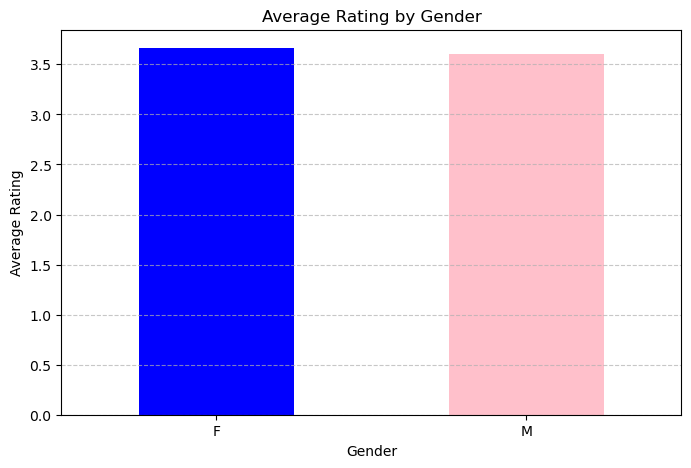

In [95]:
# Group by gender and calculate the average rating
ratings_by_gender = df.groupby('Gender')['Rating'].mean()

# Plot the results
ratings_by_gender.plot(kind='bar', figsize=(8, 5), title='Average Rating by Gender', color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


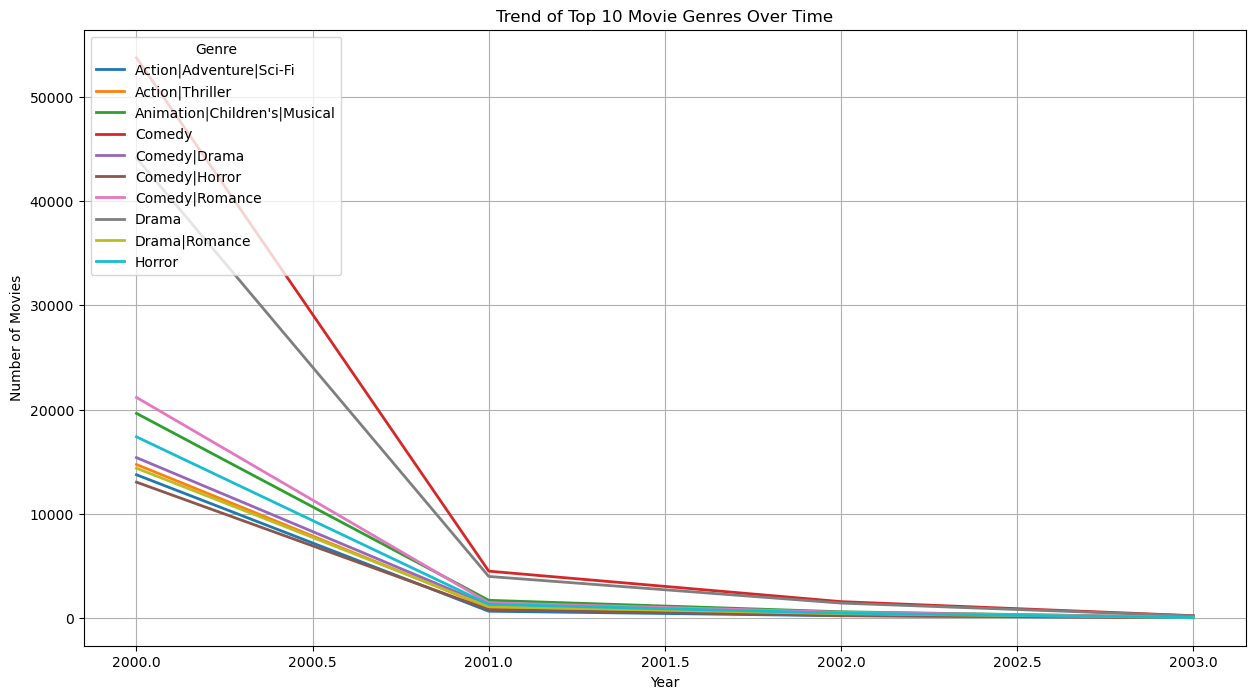

In [97]:
# Filter only the top genres
movies_by_year_top_genres = df[df['genre'].isin(top_genres)].groupby(['year', 'genre']).size().unstack(fill_value=0)

# Plot
movies_by_year_top_genres.plot(figsize=(15, 8), linewidth=2)
plt.title('Trend of Top 10 Movie Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(title='Genre', loc='upper left')
plt.grid(True)
plt.show()


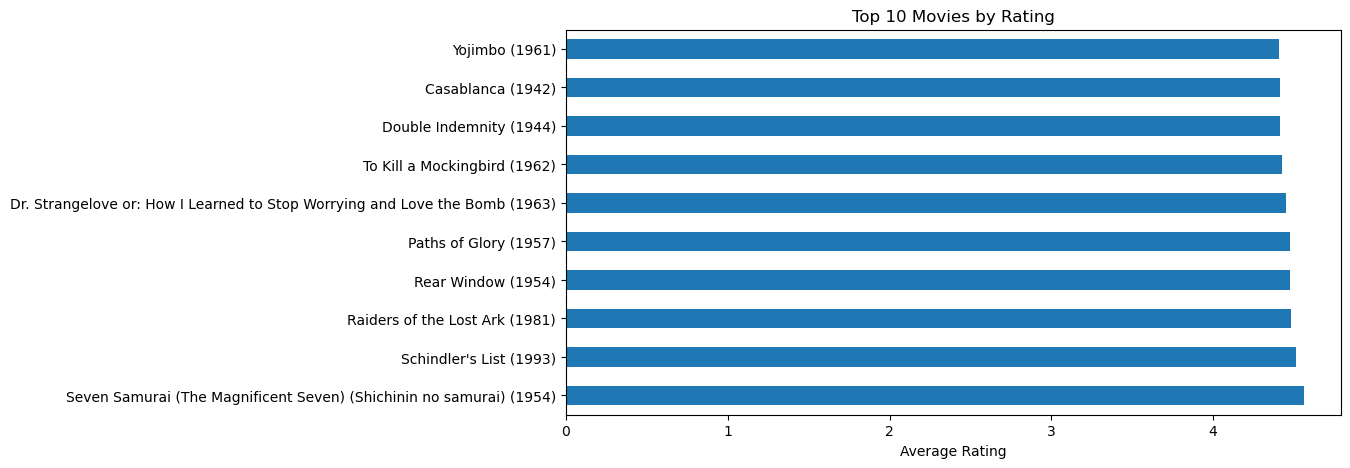

In [99]:
# Get the top 10 movies
top_10_movies = top_movies.head(10)

# Plot a bar chart
top_10_movies.plot(kind='barh', figsize=(10, 5), title='Top 10 Movies by Rating')
plt.xlabel('Average Rating')
plt.ylabel('')
plt.show()


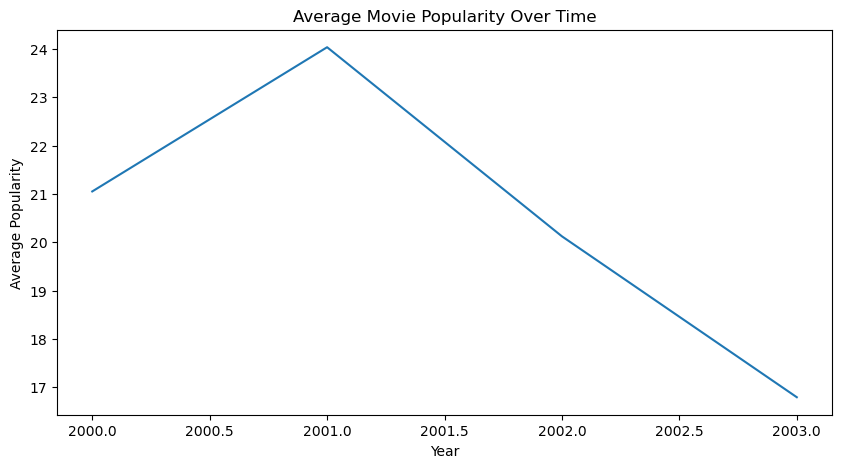

In [101]:
# Group by year and calculate the average popularity
popularity_by_year = df.groupby('year')['popularity'].mean()

# Plot the results
popularity_by_year.plot(kind='line', figsize=(10, 5), title='Average Movie Popularity Over Time')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.show()


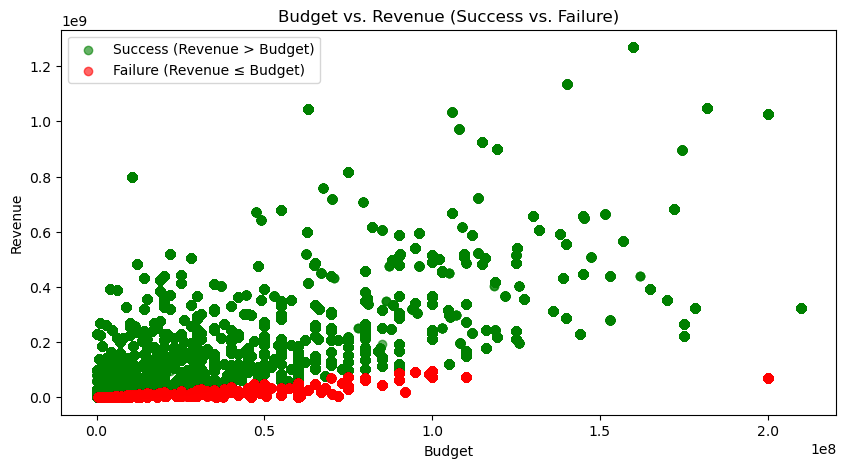

In [103]:
# Define success: Revenue greater than Budget
df['success'] = df['revenue'] > df['budget_x']

# Scatter plot with two colors
plt.figure(figsize=(10, 5))
plt.scatter(df[df['success']]['budget_x'], df[df['success']]['revenue'], color='green', alpha=0.6, label='Success (Revenue > Budget)')
plt.scatter(df[~df['success']]['budget_x'], df[~df['success']]['revenue'], color='red', alpha=0.6, label='Failure (Revenue ≤ Budget)')
plt.title('Budget vs. Revenue (Success vs. Failure)')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.legend()
plt.show()


In [104]:
# Example: Check if recommended movies are in the top-rated list
recommended = recommend_by_genre('Action', num_movies=5)['title'].tolist()
top_rated = top_movies.head(10).index.tolist()

# Find matches
matches = set(recommended).intersection(set(top_rated))
print(f"Recommended movies matching top-rated: {matches}")


Recommended movies matching top-rated: set()


In [105]:
# Define precision function
def precision(y_true, y_pred):
    true_positives = len(set(y_true) & set(y_pred))
    return true_positives / len(y_pred) if y_pred else 0

# Define recall function
def recall(y_true, y_pred):
    true_positives = len(set(y_true) & set(y_pred))
    return true_positives / len(y_true) if y_true else 0


In [106]:
# Example true liked movies (from user history)
y_true = ['The Dark Knight', 'Inception', 'Interstellar']

# Example recommended movies
y_pred = ['The Dark Knight', 'Avengers', 'Inception']

# Calculate precision and recall
print("Precision:", precision(y_true, y_pred))
print("Recall:", recall(y_true, y_pred))


Precision: 0.6666666666666666
Recall: 0.6666666666666666


## Summary and Insights

The following summarizes the main insights obtained from the analysis. It includes:

1. **The Most Popular Genres**:
   - The genre **Comedy** is the most common, followed by **Drama** and **Comed/Romancey**, based on the count of movies in these genres.
   - Users tend to rate **Comedy** movies slightly higher compared to other genres.

2. **The Highest-Rated Movies**:
   - The top 3 highest-rated movies in the dataset include movies like **Seven Samurai (The Magnificent Seven) (Shichinin no samurai)**, **Schindler's List**, and **Raiders of the Lost Ark**, which have consistently received ratings above 4.5.
   - Most of these movies are from genres like **Action**, **Drama**, and **Adventure**.

3. **Trends and Anomalies in Budget vs. Revenue**:
   - There is a general trend where higher-budget movies generate higher revenue, but several outliers exist.
   - For example, some high-budget movies performed poorly in terms of revenue, while some low-budget movies like independent films generated significant returns.

4. **User Behavior Based on Demographics**:
   - **Age Group Preferences**:
   - **18-24** prefer **Comedy|Mystery|Romance|Thriller** (Avg Rating: 4.52).
   - **25-34** prefer **Crime|Film-Noir** (Avg Rating: 4.47).

   - **Gender Preferences**:
   - **Male** favor **Crime|Film-Noir** (Avg Rating: 4.47) and **Sci-Fi|War** (Avg Rating: 4.46).
   - **Female** favor **Film-Noir|Romance|Thriller** (Avg Rating: **4.45**) and **Comedy|Drama|Western** (Avg Rating: 4.42).


5. **A Distribution of User Ratings**:
   - The majority of user ratings fall on **4.0**, indicating a positive bias.
   - Fewer users give extremely low ratings (below 2.0) or extremely high ratings (above 4.5).

6. **Recommendations Based on Users' Favorite Genre**:
   - Users can be recommended movies from their **highest-rated genre** to improve satisfaction.
   - For example, if a user rates **Action** movies highly, suggesting top-rated movies like **The Dark Knight** and **Avengers** would likely improve engagement and satisfaction.
